'''Task 1 — Load & Inspect the Dataset
1.	Load the dataset  into your notebook.
2.	Display the first 5 and last 5 rows of the dataset.
3.	Print dataset shape (rows, columns).
4.	Print dataset information using .info().
5.	Identify basic data types of all columns.'''

'''Task 2 — Clean the Dataset
Identify and count missing values in each column.
Drop column(s) that are irrelevant for price analysis (example: society or unnamed columns).
Handle missing values in numeric columns such as bath, balcony, etc. (use either dropna() or fillna() depending on your reasoning).
Convert total_sqft to numeric — handle values like "2100 - 2850" by converting them to an average or a single number.
Remove duplicate rows.
6. Reset the DataFrame index after cleaning'''



'''Task 4 — Data Visualization
Use the specific visualization types mentioned for each question.
Price Distribution:
Plot the distribution of the price column using a Histogram + KDE curve.
Relationship Between Area and Price:
Visualize the relationship between total_sqft and price using a Scatter Plot.
Effect of Bathrooms on Price:
Show how bath count affects house prices using a Box Plot.
Top 10 Most Expensive Locations:
Plot the Top 10 locations with highest average price using a Bar Chart.
Correlation Between Numeric Columns:
Create a Heatmap to visualize correlations among numeric features (price, total_sqft, bath, balcony, etc.).'''




In [ ]:
'''Task 1 — Load & Inspect the Dataset
1.	Load the dataset  into your notebook.
2.	Display the first 5 and last 5 rows of the dataset.
3.	Print dataset shape (rows, columns).
4.	Print dataset information using .info().
5.	Identify basic data types of all columns.'''

'''Task 2 — Clean the Dataset
Identify and count missing values in each column.
Drop column(s) that are irrelevant for price analysis (example: society or unnamed columns).
Handle missing values in numeric columns such as bath, balcony, etc. (use either dropna() or fillna() depending on your reasoning).
Convert total_sqft to numeric — handle values like "2100 - 2850" by converting them to an average or a single number.
Remove duplicate rows.
6. Reset the DataFrame index after cleaning'''



'''Task 4 — Data Visualization
Use the specific visualization types mentioned for each question.
Price Distribution:
Plot the distribution of the price column using a Histogram + KDE curve.
Relationship Between Area and Price:
Visualize the relationship between total_sqft and price using a Scatter Plot.
Effect of Bathrooms on Price:
Show how bath count affects house prices using a Box Plot.
Top 10 Most Expensive Locations:
Plot the Top 10 locations with highest average price using a Bar Chart.
Correlation Between Numeric Columns:
Create a Heatmap to visualize correlations among numeric features (price, total_sqft, bath, balcony, etc.).'''




In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

from google.colab import drive

#Mount your Drive
drive.mount('/content/drive')

#once mounted,navigate to the folder
#example path(adjust bsed on your structure)
path='/content/drive/My Drive/Colab Notebooks/Bengaluru_House_Data.csv'

df=pd.read_csv(path)

Mounted at /content/drive


In [4]:
print(df.head())
print(df.tail())
print(df.shape)
print(df.info())
print("Basic datatypes of all columns")
print(df['area_type'].dtype)
print(df['availability'].dtype)
print(df['location'].dtype)
print(df['size'].dtype)
print(df['society'].dtype)
print(df['total_sqft'].dtype)
print(df['bath'].dtype)
print(df['balcony'].dtype)
print(df['price'].dtype)

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  
                  area_type   availability               location       size  \
13315        Built-up  Area  Ready To Move             Whitefield  5 Bedroom   
13316  Super built-up  Area  Ready To Move          Richards Town      4 BHK   
133

In [5]:
print("counting missing values in each column")
print(df.isnull().sum())
print(df.drop(['society'],axis=1,inplace=True,errors='ignore'))
print(df.isnull().sum())
print("Handling missing values")
df['bath'].fillna(df['bath'].median(),inplace=True)
df['balcony'].fillna(0,inplace=True)
print(df.isnull().sum())

def convert_sqft(x):
    if(x.count('-')!=0):
        a,b=x.split('-')
        return (float(a)+float(b))/2
    return x
df['total_sqft']=df['total_sqft'].apply(convert_sqft)
print(df['total_sqft'])
df.dropna(subset=['total_sqft'],inplace=True)

df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()


counting missing values in each column
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64
None
area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64
Handling missing values
area_type        0
availability     0
location         1
size            16
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64
0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13320, dtype: object


,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
import numpy as np
import re

# 1) Clean total_sqft (convert to numeric)
def convert_sqft(x):
    x = str(x)

    # Case 1: if numeric, return directly
    if re.match(r'^\d+(\.\d+)?$', x):
        return float(x)

    # Case 2: if it's a range like "2100 - 2850"
    if '-' in x:
        a, b = x.split('-')
        try:
            return (float(a) + float(b)) / 2
        except:
            return np.nan

    # Case 3: extract first number (e.g., "34.46Sq. Meter")
    match = re.search(r'(\d+(\.\d+)?)', x)
    if match:
        return float(match.group(1))

    return np.nan

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)

# Convert numeric columns safely
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['bath'] = pd.to_numeric(df['bath'], errors='coerce')

# Drop rows where total_sqft or price is missing
df = df.dropna(subset=['total_sqft', 'price'])

# 1) How many unique locations?
print("1) Number of unique locations:", df['location'].nunique())

# 2) Average house price per location
avg_price = df.groupby('location')['price'].mean().sort_values(ascending=False)
print("\n2) Average price per location (Top 10):")
print(avg_price.head(10))

# 3) Location with highest average price
top_loc = avg_price.idxmax()
top_price = avg_price.max()
print(f"\n3) Highest average price location: {top_loc} — {top_price:.2f} lakhs")

# 4) Correlation between sqft, bath, price
corr = df[['total_sqft', 'bath', 'price']].corr()
print("\n4) Correlation:\n", corr)

# 5) Interpretation (simple logic)
corr_sqft_price = corr.loc['total_sqft', 'price']
print("\n5) Interpretation:")

if corr_sqft_price > 0.7:
    print("• Strong positive correlation → Larger houses generally have higher prices.")
elif corr_sqft_price > 0.4:
    print("• Moderate correlation → Larger houses often cost more, but not always.")
else:
    print("• Weak correlation → Size alone does NOT determine price.")

1) Number of unique locations: 1305

2) Average price per location (Top 10):
location
Cubbon Road            1900.000000
Ashok Nagar            1486.000000
Defence Colony         1167.714286
Yemlur                 1093.388889
Church Street          1068.000000
D Souza Layout         1015.000000
Sadashiva Nagar        1011.100000
Sindhi Colony           988.000000
Srinivas Colony         922.000000
5th Block Jayanagar     905.000000
Name: price, dtype: float64

3) Highest average price location: Cubbon Road — 1900.00 lakhs

4) Correlation:
             total_sqft      bath     price
total_sqft    1.000000  0.383806  0.571708
bath          0.383806  1.000000  0.450925
price         0.571708  0.450925  1.000000

5) Interpretation:
• Moderate correlation → Larger houses often cost more, but not always.


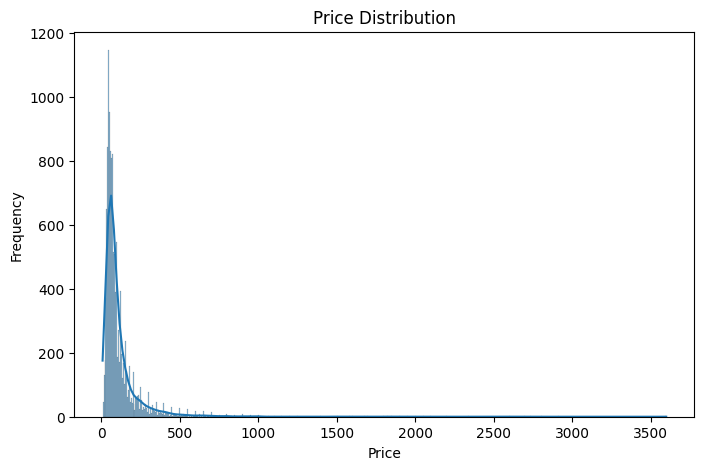

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

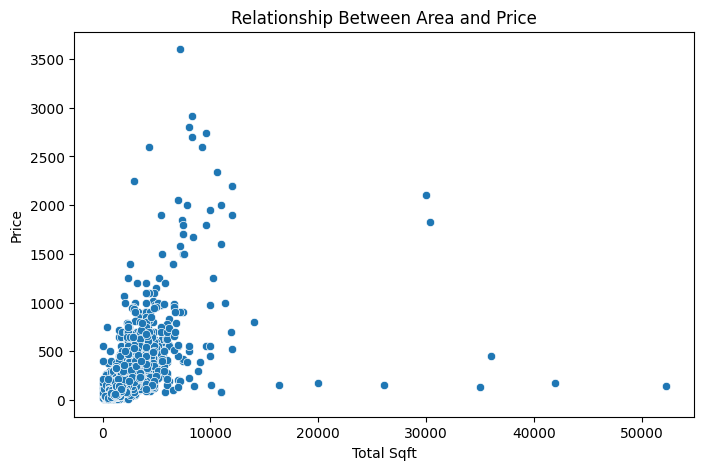

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['total_sqft'], y=df['price'])
plt.title("Relationship Between Area and Price")
plt.xlabel("Total Sqft")
plt.ylabel("Price")
plt.show()

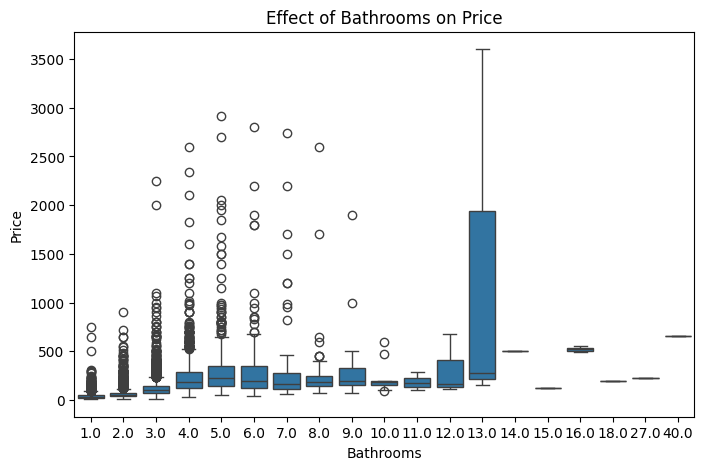

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['bath'], y=df['price'])
plt.title("Effect of Bathrooms on Price")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.show()

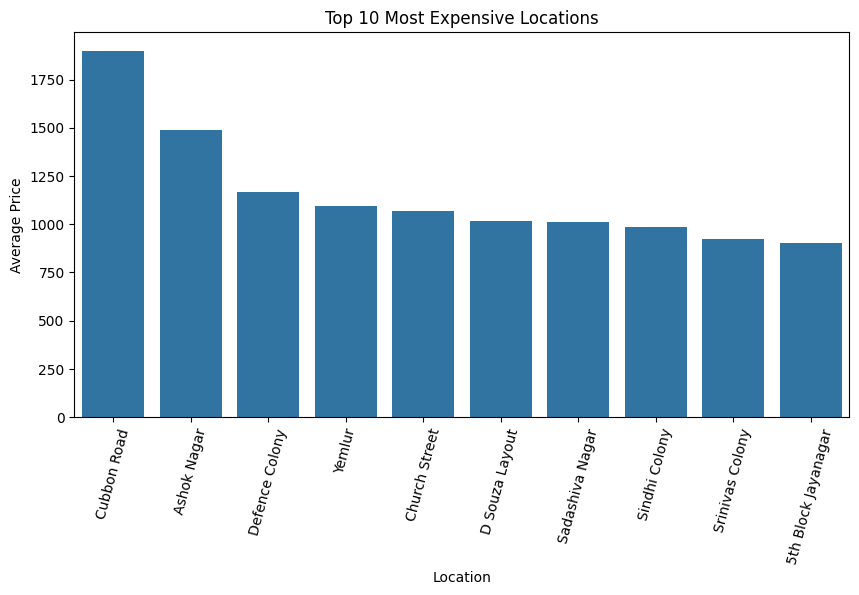

In [10]:
top10 = df.groupby('location')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top10.index, y=top10.values)
plt.title("Top 10 Most Expensive Locations")
plt.xlabel("Location")
plt.ylabel("Average Price")
plt.xticks(rotation=75)
plt.show()

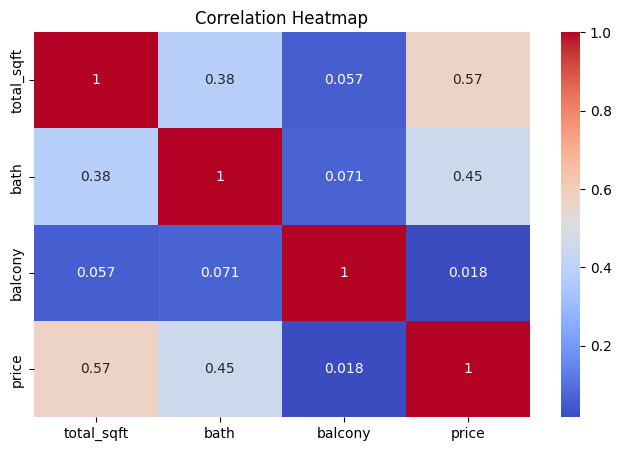

In [11]:
plt.figure(figsize=(8,5))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()